Get relevant modules and set path

In [1]:
from IPython.display import Image
import pandas as pd
import sys
import os

%load_ext autoreload
%autoreload 2

mypath = '/Users/Q004/Desktop/greatbrowser' #your directory here 
sys.path.insert(0, mypath)
os.chdir(mypath)

from greatbrowser import great_get_options, great_analysis, great_global_controls

Get the sample datasets

In [2]:
data_1 = pd.read_excel('tests/sample_data/sample_data_1.xlsx'); data_1.columns = ['chr', 'start', 'index', 'end']
data_2 = pd.read_excel('tests/sample_data/sample_data_2.xlsx')
data_3 = pd.read_csv('tests/sample_data/sample_data_3.csv')
data_4 = pd.read_csv('tests/sample_data/sample_data_4.bed', sep='\t')

To show the available global control options, use great_global_controls()

In [13]:
great_global_controls()

Global Control Keys: Input = GREAT Label:

minFold = Minimum Region-based Fold Enrichment:	int
n_gene_hits or minAnnotFgHitGenes = Observed Gene Hits:	 int
filterText = Term Name Filter:	str
allMinAC = Term Annotation Count Min:	int
allMaxAC = Term Annotation Count Max:	int
sigValue = Statistical Significance Threshhold:	float
view = Significance view:	viewSigByBoth, viewSigByRegion, viewFull


To how the available 'get=' parameter options, use great_get_options()

In [44]:
great_get_options()

"get" Parameter Options:

get = genes 	 returns a dataframe of the inputted data + genes associated with each probe. For large datasets, run multiple iterations and merge dataframes post-hoc using pd.concat
get = ucsc_browser 	 opens ucsc genome browser for the inputted data
get = genes_pivot 	 same as genes, but grouped by gene rather than region
get = n_genes_region 	 saves a barplot showing the number of region with x gene associations, grouped by x, as a png
get = n_genes_TSS 	 saves a batplot showing the distance between each probe/gene pair, grouped by kilobases, as a png
get = n_genes_abs_TSS 	 same as n_genes_TSS but with absolute value being used for distance

The below options all additionally save a png if plot=bar (barplot) or plot=hierarchy (hierarchy plot) (default=False)

get = ensembl_genes 	 returns a dataframe of the Ensembl genes processes associated with the probe set
get = go_process 	 returns a dataframe of the GO biological processes associated with the probe set

In [37]:
data_1

,chr,start,index,end
0,chr1,4748088,Velvet,4748507
1,chr1,4768378,Mountain,4780503
2,chr1,4848009,Elephant,4848547
3,chr1,5046471,Harmony,5046985
4,chr1,5146655,Quantum,5146913
...,...,...,...,...
324,chr1,51570334,Vault,51600876
325,chr1,51614863,Ember,51626735
326,chr1,51644387,Dream,51644755
327,chr1,51669990,Tapestry,51670401


To get the genes associated with each inputted region, use get='genes'

In [5]:
gene_df = great_analysis(test_regions=data_1, get='genes', assembly='hg38',
                         is_formatted=False, df_start='start', df_end='end', df_index='index', df_chr='chr', headless=True) 

# test regions = the regions of the genes to be associated
# get = what we are getting from GREAT
# assembly = the genome assembly for referencing genes. Great only goes up to hg38 and mm10, so you may need to use liftover seperately
# is_formatted = whether we are working with data that is in bed format. Becuase index is in the 2nd column this is not the case for data_1
# df_start/end/index/chr = the column names containing this information. If you don't have column names everything needs to be ordered
# headless = whether to show the browser or keep it hidden, headless=False is a double negative that shows the browser

gene_df

,chr,start,end,index,associated_genes
0,chr1,4748088,4748507,Velvet,"AJAP1 (+93,253)"
1,chr1,4768378,4780503,Mountain,"AJAP1 (+119,396)"
2,chr1,4848009,4848547,Elephant,"AJAP1 (+193,233)"
3,chr1,5046471,5046985,Harmony,"AJAP1 (+391,683), NPHP4 (+945,743)"
4,chr1,5146655,5146913,Quantum,"AJAP1 (+491,739), NPHP4 (+845,687)"
...,...,...,...,...,...
324,chr1,51570334,51600876,Vault,"EPS15 (-66,277), OSBPL9 (-31,487)"
325,chr1,51614863,51626735,Ember,"OSBPL9 (+3,707), NRDC (+258,006)"
326,chr1,51644387,51644755,Dream,"OSBPL9 (+27,479), NRDC (+234,234)"
327,chr1,51669990,51670401,Tapestry,"OSBPL9 (+53,104), NRDC (+208,609)"


Get the go functions for data_1

In [8]:
# convert the chromosomes from 'chr1' format to integer, and change the assembly (for robustness of testing)
data_1['chr'] = data_1['chr'].str.replace('chr', '').astype(int)

# we don't actually need to specify the start, end, or chr for data_1, because these are defaulted to 'start', 'end', 'chr', and 'index' respectively
go_df = great_analysis(test_regions=data_1, get='go_function', assembly='hg19', headless=True) 

go_df

,term_name,go_annotation,binom_rank,binom_raw_pval,binom_bonferroni_pval,binom_fdr_qval,binom_fold_enrichment,binom_expected,binom_obs_region_hits,binom_genome_fraction,...,hyper_rank,hyper_raw_pval,hyper_bonferroni_pval,hyper_fdr_qval,hyper_fold_enrichment,hyper_expected,hyper_obs_gene_hits,hyper_total_genes,hyper_gene_set_coverage,hyper_term_gene_coverage
0,miRNA binding,GO:0035198,9,6.3738e-17,2.6891e-13,2.9879e-14,22.7322,0.7038,16,0.0021,...,1,6.1805e-6,2.6075e-2,2.6075e-2,18.4898,0.2704,5,24,2.39%,20.83%


Get the mouse knockout phenotypes for data_1

In [14]:
# get the outputted mouse knockout phenotypes. This works across species
mm_ko_df = great_analysis(test_regions=data_1, get='mouse_phenotype_ko', assembly='hg38', df_index='name')
mm_ko_df.head()

,term_name,go_annotation,binom_rank,binom_raw_pval,binom_bonferroni_pval,binom_fdr_qval,binom_fold_enrichment,binom_expected,binom_obs_region_hits,binom_genome_fraction,...,hyper_rank,hyper_raw_pval,hyper_bonferroni_pval,hyper_fdr_qval,hyper_fold_enrichment,hyper_expected,hyper_obs_gene_hits,hyper_total_genes,hyper_gene_set_coverage,hyper_term_gene_coverage
0,decreased monocyte cell number,MP:0000223,4,2.6220e-26,2.4010e-22,6.0025e-23,12.5799,2.7027,34,0.0082,...,5,6.7881e-15,6.2158e-11,1.2432e-11,13.6205,1.2481,17,108,7.83%,15.74%
1,abnormal monocyte cell number,MP:0012441,13,1.4053e-17,1.2868e-13,9.8986e-15,6.2903,5.5641,35,0.0169,...,7,4.7665e-11,4.3646e-7,6.2352e-8,7.3817,2.4385,18,211,8.29%,8.53%
2,abnormal monocyte morphology,MP:0002620,15,3.1986e-17,2.9290e-13,1.9527e-14,6.1204,5.7186,35,0.0174,...,8,7.0303e-11,6.4377e-7,8.0471e-8,7.2108,2.4962,18,216,8.29%,8.33%


Now plot the mouse knockout phenotypes for data_1 as a hierarchy plot, using GREAT's built-in functionality, and set a custom name so that it is saved to the sample output folder

PNG image downloaded successfully as 'tests/sample_figures/mouse_phenotype_KO_hierarchy_plot.png'


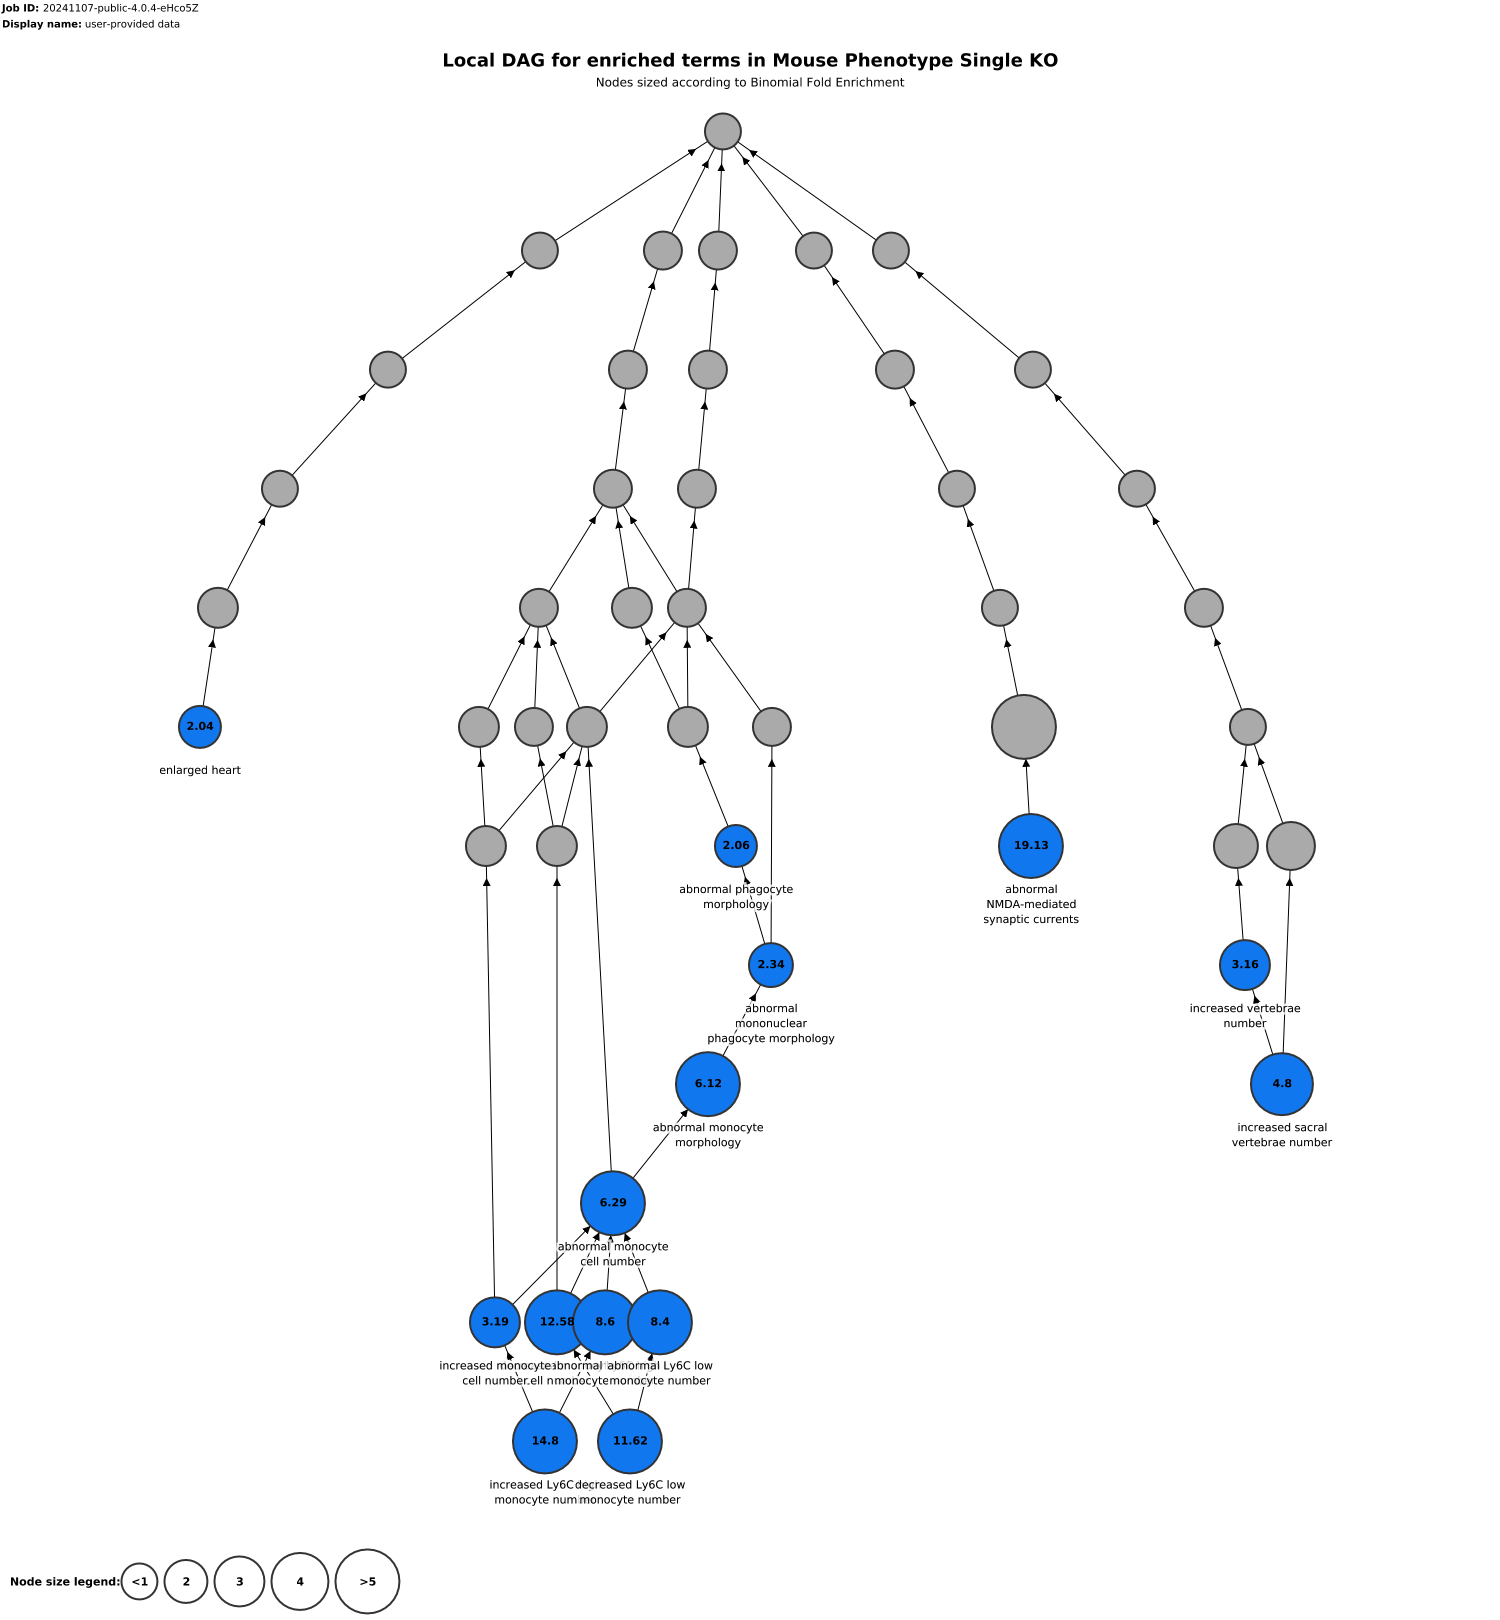

In [46]:
# now plot the mouse phenotype KO using GREATs built in functionality, and save the file
mm_ko_df = great_analysis(test_regions=data_1, get='mouse_phenotype_KO', assembly='hg38', is_formatted=False, 
                          df_index='name', plot='hierarchy', file_name='tests/sample_figures/mouse_phenotype_KO_hierarchy_plot')

Image(filename='tests/sample_figures/mouse_phenotype_KO_hierarchy_plot.png') 

Now lets output this as a barplot, tweaking some of the global settings

PNG image downloaded successfully as 'tests/sample_figures/the_bar.png'


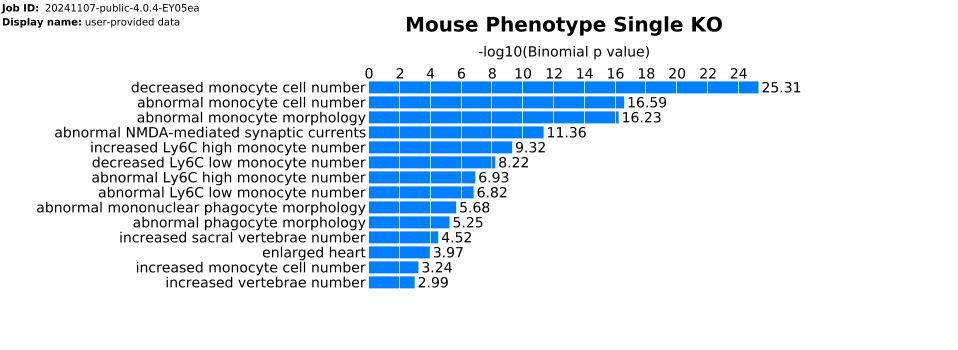

In [47]:
mm_ko_df2 = great_analysis(test_regions=data_1, get='mouse_phenotype_KO', assembly='hg38', 
                           is_formatted=False, df_index='name', plot='bar', assoc_criteria='two_closest',
                           global_controls = {'sigValue' : 0.01},
                           file_name='tests/sample_figures/the_bar')

# assoc_criteria changes how GREAT associates a given position with a gene
# global controls is a dictionary that allows for a high degree of customization. See great_global_controls()
# file_name determines the output file name

Image(filename='tests/sample_figures/the_bar.png') 

Now try out several other formats

In [29]:
# csv
gene_df = great_analysis(test_regions=data_3, get='genes', assembly='mm10', df_index='index', 
                             df_chr='chr_mm10', df_start = 'pos_mm10', df_end='end_mm10')
gene_df.head()

,chr_mm10,pos_mm10,end_mm10,index,associated_genes
0,chr12,75515718,75515720,cg00101675_BC21,"Gphb5 (-98,938), Ppp2r5e (+80,481)"
1,chr15,12170849,12170851,cg00116289_BC21,"Mtmr12 (-34,178), Zfr (+53,019)"
2,chrX,57387383,57387385,cg00211372_TC21,"Arhgef6 (-48,655), Rbmx (+5,652)"
3,chr19,6375936,6375938,cg00531009_BC21,"Pygm (-8,462), Sf1 (+12,247)"
4,chr18,35572741,35572743,cg00747726_TC21,"Paip2 (-25,907), Matr3 (+10,584)"


In [14]:
# csv by path, using just the start
gene_df = great_analysis(test_regions='tests/sample_data/sample_data_3.csv', get='genes', assembly='mm10', df_index='index', 
                             df_chr='chr_mm10', df_start = 'pos_mm10')
gene_df.head()

,chr_mm10,pos_mm10,end,index,associated_genes
0,chr12,75515718,75515718,cg00101675_BC21,"Gphb5 (-98,938), Ppp2r5e (+80,482)"
1,chr15,12170849,12170849,cg00116289_BC21,"Mtmr12 (-34,179), Zfr (+53,019)"
2,chrX,57387383,57387383,cg00211372_TC21,"Arhgef6 (-48,655), Rbmx (+5,653)"
3,chr19,6375936,6375936,cg00531009_BC21,"Pygm (-8,463), Sf1 (+12,247)"
4,chr18,35572741,35572741,cg00747726_TC21,"Paip2 (-25,908), Matr3 (+10,584)"


In [ ]:
# BED, for a very long dataset (>200,000 regions, for which only get='genes' is supported)
gene_df = great_analysis(test_regions=data_4, get='genes', assembly='mm10')
gene_df.head()

,chr,start,end,index,associated_genes
0,chr12,75515718,75515720,cg00101675_BC21,"[Gphb5 (-98,938), Ppp2r5e (+80,481)]"
1,chr15,12170849,12170851,cg00116289_BC21,"[Mtmr12 (-34,178), Zfr (+53,019)]"
2,chrX,57387383,57387385,cg00211372_TC21,"[Arhgef6 (-48,655), Rbmx (+5,652)]"
3,chr19,6375936,6375938,cg00531009_BC21,"[Pygm (-8,462), Sf1 (+12,247)]"
4,chr18,35572741,35572743,cg00747726_TC21,"[Paip2 (-25,907), Matr3 (+10,584)]"


In [32]:
# BED by path, for a very long dataset (>200,000 regions, for which only get='genes' is supported)
gene_df = great_analysis(test_regions='tests/sample_data/sample_data_4.bed', get='genes', assembly='mm10')
gene_df.head()

,chr,start,end,index,associated_genes
0,chr12,75515718,75515720,cg00101675_BC21,"Gphb5 (-98,938), Ppp2r5e (+80,481)"
1,chr15,12170849,12170851,cg00116289_BC21,"Mtmr12 (-34,178), Zfr (+53,019)"
2,chrX,57387383,57387385,cg00211372_TC21,"Arhgef6 (-48,655), Rbmx (+5,652)"
3,chr19,6375936,6375938,cg00531009_BC21,"Pygm (-8,462), Sf1 (+12,247)"
4,chr18,35572741,35572743,cg00747726_TC21,"Paip2 (-25,907), Matr3 (+10,584)"


What if our data has errors?

In [ ]:
data_2

,chr,start,end
0,chr1,4748088,4748507
1,chr1,4768378,4780503
2,chr1,4848009,4848547
3,chr1,5046471,5046985
4,chr1,5146655,5146913
...,...,...,...
324,chr1,51570334,51600876
325,chr1,51614863,51626735
326,chr1,51644387,51644755
327,chr1,51669990,51670401


In [ ]:
# though not the cause of the present error, note that background regions needs to be in the same format as the test regions

gene_df = great_analysis(test_regions=data_2, background_regions=data_1[['chr', 'start', 'end', 'index']], get='ensembl_genes', assembly='hg38',
                         is_formatted=False, df_start='start', df_end='end', df_index='index', df_chr='chr', headless=True) 

# tip: use headless=False to troubleshoot

GREAT encountered an error in your test set "user-provided data" and/or in your background set "user-provided background data".
Please modify your data and re-submit it. If you need to report this error, please include this id: 20241107-public-4.0.4-EIyCwR
The foreground set is not a subset of the background set. GREAT requires each foreground element to be reproduced exactly within the background set.


Exception: Error: Loading exceeded 20 seconds. Potential reasons: invalid input (generally or for assembly) or connection problems. Use headless=False to troubleshoot.

What if the table we select is empty?

In [60]:
gene_df = great_analysis(test_regions=data_2, get='ensembl_genes', assembly='hg38',
                         is_formatted=False, df_start='start', df_end='end', df_index='index', df_chr='chr', headless=False) 

No results meet your chosen criteria.
